In [3]:
import time
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

(998, 800)


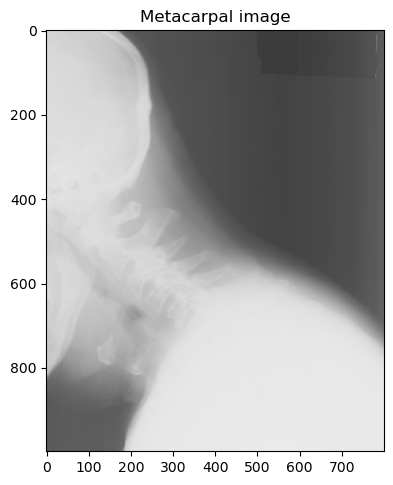

In [5]:
in_dir = "data/"

# Text file name
im_name = "vertebra.png"
im_org = io.imread(in_dir + im_name)



print(im_org.shape)

io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

In [8]:
#Exercise 2
print(min(im_org.flatten()), max(im_org.flatten()))

57 235


In [9]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

In [10]:
vert_float = img_as_float(im_org)

In [12]:
print(min(vert_float.flatten())*255, max(vert_float.flatten())*255)

56.99999999999999 235.0


In [13]:
#Exercise 4
vert_ubyte = img_as_ubyte(vert_float)

In [14]:
print(min(vert_ubyte.flatten()), max(vert_ubyte.flatten()))

57 235


In [16]:
#Exercise 5
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Stretch the histogram
    img_out = (img_float - min_val) / (max_val - min_val) * (max_desired - min_desired) + min_desired   
    

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

In [20]:
# Exercise 6
stretched = histogram_stretch(vert_ubyte)

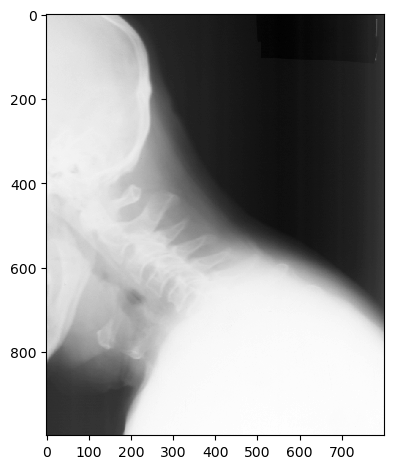

In [23]:
io.imshow(stretched)

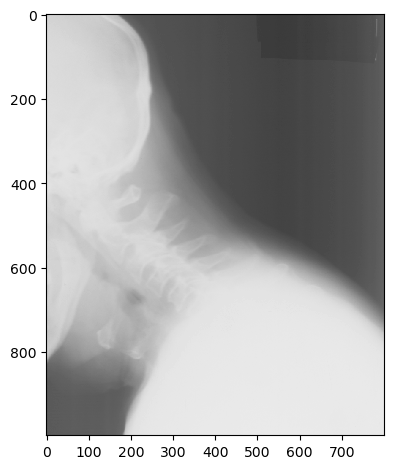

In [24]:
io.imshow(vert_ubyte)

In [25]:
# Exercise 7
def gamma_map(img, gamma):
    img_float = img_as_float(img)
    img_out = img_float ** gamma
    return img_as_ubyte(img_out)

    

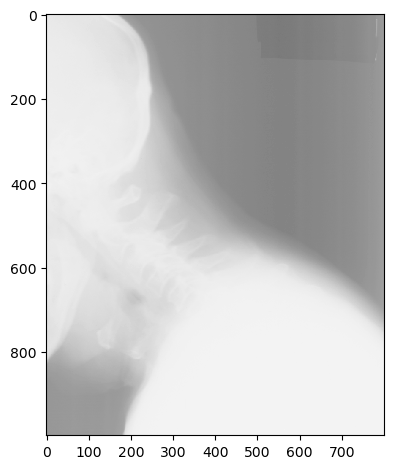

In [27]:
# Exercise 8
gamma1 = gamma_map(vert_ubyte, 0.5)
io.imshow(gamma1)

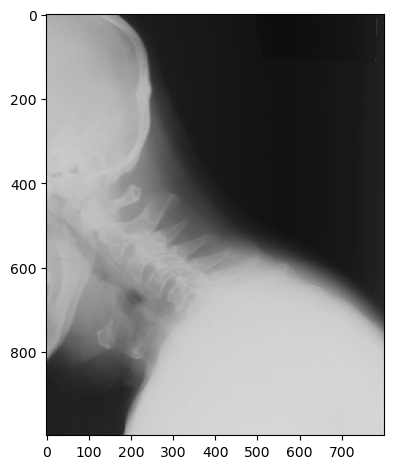

In [29]:
gamma2 = gamma_map(vert_ubyte, 2)
io.imshow(gamma2)

In [30]:
# Exercise 9
def threshhold(img, t):
    assert 0 <= t <= 255
    img_float = img_as_float(img)
    img_out = img_float > t
    maskover = img_out >t
    maskunder = img_out <t
    img_out[maskover] = 255
    img_out[maskunder] = 0
    return img_as_ubyte(img_out)

In [49]:
# Exercise 10
thresh = threshhold(vert_ubyte, 0.5803921568627451)

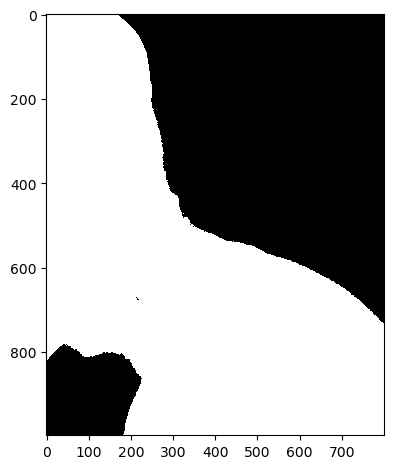

In [50]:
io.imshow(thresh)

In [48]:
# Exercise 11
from skimage.filters import threshold_otsu

otsu_thresh = threshold_otsu(vert_ubyte)/255
print(otsu_thresh)

0.5803921568627451


0.3764705882352941


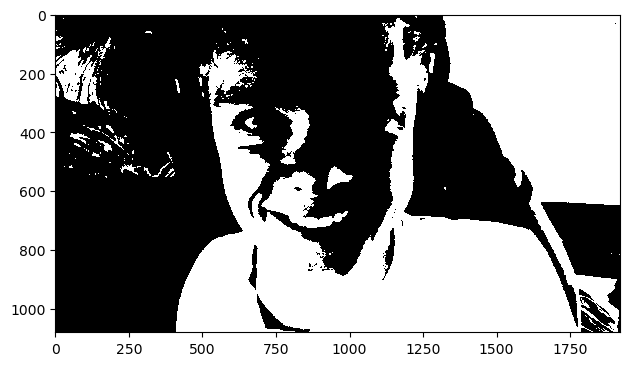

In [61]:
# Exercise 12
img_name = "emilxd.jpg"
img = io.imread(in_dir + img_name)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

otsu_thresh = threshold_otsu(gray)/255
print(otsu_thresh)

thresh = threshhold(gray, otsu_thresh)
io.imshow(thresh)

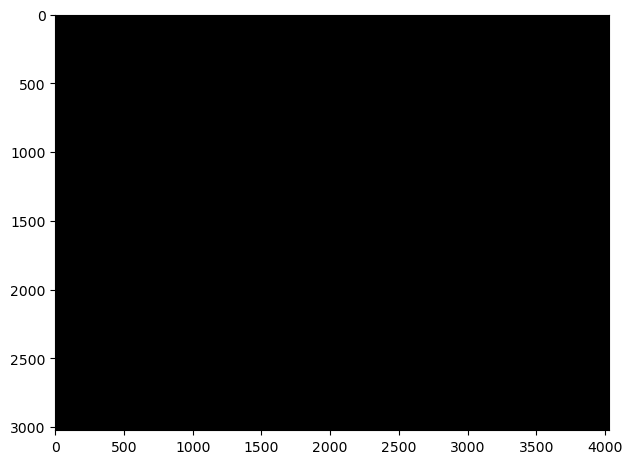

In [97]:
# Exercise 13
def detect_dtu_sign(img, colour):
    r_comp = img[:, :, 0]
    g_comp = img[:, :, 1]
    b_comp = img[:, :, 2]
    if colour == "blue":
        segm_blue = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
        return segm_blue
    elif colour == "red":
        segm_red = (r_comp > 200) & (r_comp < 220) & (g_comp < 10) & \
                (b_comp < 10)
        return segm_red
    elif colour == "green":
        segm_green = (r_comp < 10) & (g_comp > 180) & (b_comp < 10)
        return segm_green
dtusign= "DTUSigns2.jpg"
dtusign = io.imread(in_dir + dtusign)
io.imshow(detect_dtu_sign(dtusign, "red"))

Text(0.5, 1.0, 'Blue sign')

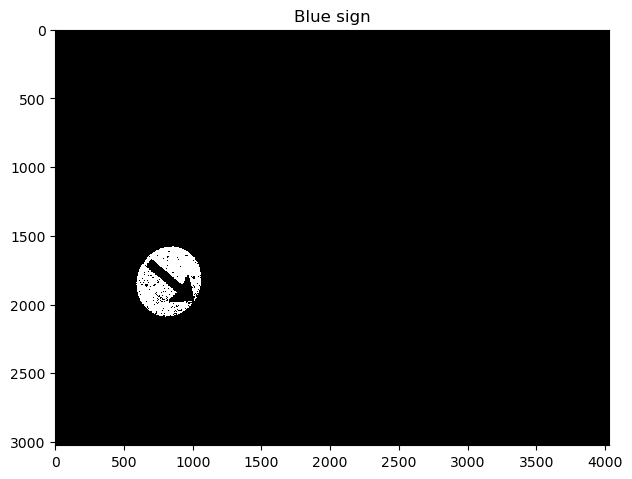

In [67]:
io.imshow(detect_dtu_sign(dtusign, "blue"))
plt.title("Blue sign")

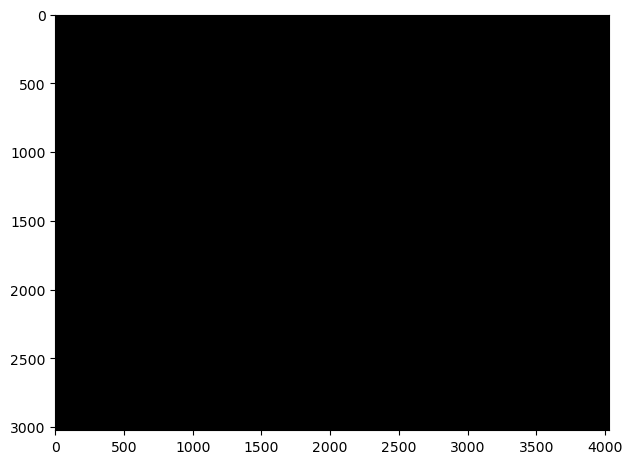

In [68]:
io.imshow(detect_dtu_sign(dtusign, "red"))